In [64]:
import pandas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, accuracy_score, precision_score
from sklearn.metrics import precision_recall_curve, roc_curve
from matplotlib import pyplot
import graphviz 

In [65]:
dataset = pandas.read_csv("diabetes.csv")

X = dataset[dataset.columns.difference(["Outcome"])]
target = dataset["Outcome"]

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=0)

In [67]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

print("R2:", r2_score(Y_test, Y_predicted))
print("Accuracy:", accuracy_score(Y_test, Y_predicted))
print("Precision:", precision_score(Y_test, Y_predicted))

R2: 0.1731954662954862
Accuracy: 0.8246753246753247
Precision: 0.7631578947368421


In [68]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

print("R2:", r2_score(Y_test, Y_predicted))
print("Accuracy:", accuracy_score(Y_test, Y_predicted))
print("Precision:", precision_score(Y_test, Y_predicted))

R2: -0.22489560548816856
Accuracy: 0.7402597402597403
Precision: 0.5686274509803921


Результаты проверки метрик показывают, что логистическая модель лучше подходит для решения данной задачи.

Исследуем значение метрики accuracy_score (так как ее очень легко воспринимать) в зависимости от глубины решающего дерева

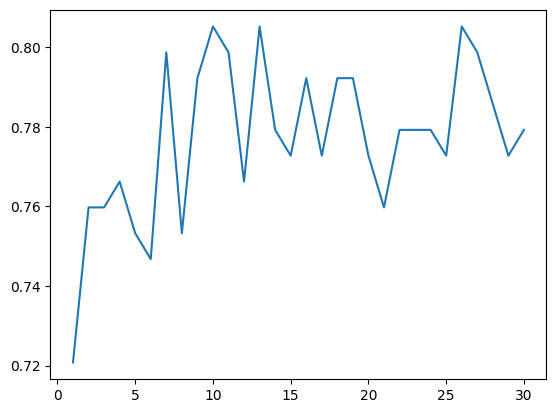

In [69]:
depths = range(1, 31, 1)
scores = []

for depth in depths:
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(X_train, Y_train)
    Y_predicted = classifier.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_predicted))

bestScore = max(scores)
bestDepth = scores.index(bestScore) + 1
pyplot.plot(depths, scores)
pyplot.show()

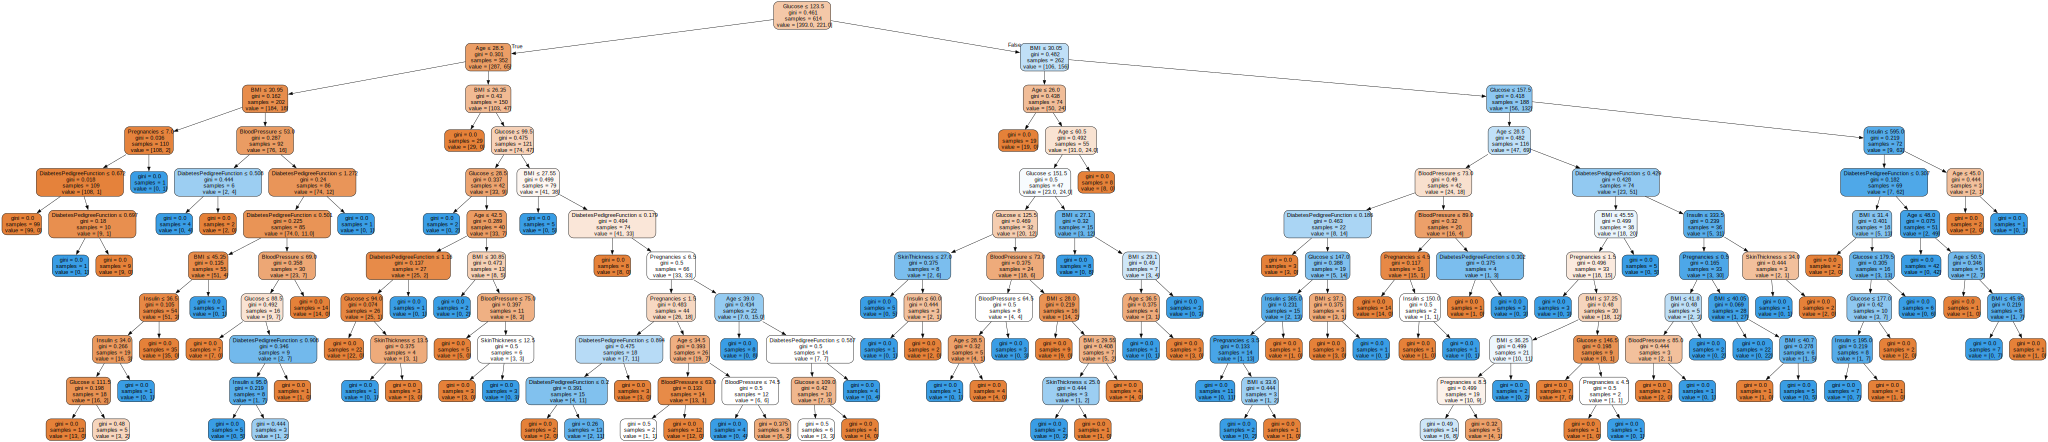

In [70]:
classifier = DecisionTreeClassifier(max_depth=bestDepth)
classifier.fit(X_train, Y_train)

dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

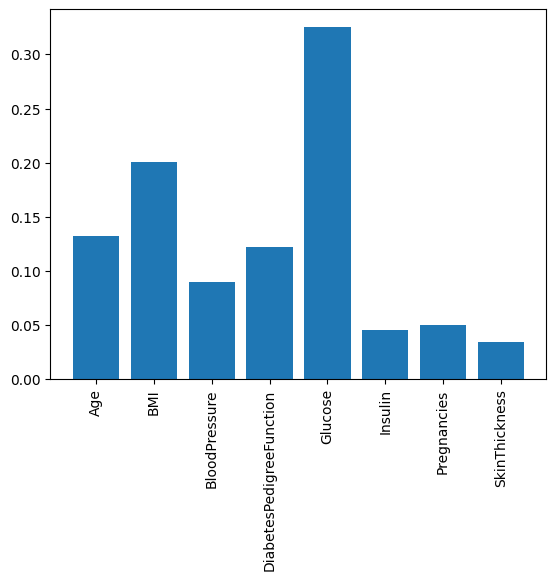

In [71]:
pyplot.bar(X.columns, classifier.feature_importances_)
pyplot.xticks(rotation=90)
pyplot.show()

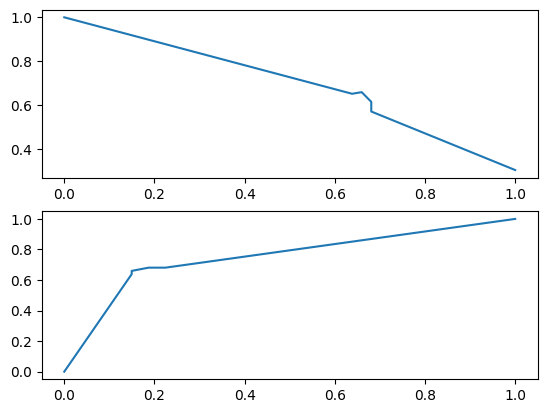

In [72]:
fig, (ax1, ax2) = pyplot.subplots(2)
Y_scores = classifier.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(Y_test, Y_scores)
ax1.plot(recall, precision)

fpr, tpr, _ = roc_curve(Y_test, Y_scores)
ax2.plot(fpr, tpr)